# Data Visualisation and Exploratory Data Analysis (EDA)

## Overview
This notebook provides comprehensive data visualisation and exploratory data analysis of the global energy consumption and CO₂ emissions dataset. We'll use multiple visualisation libraries (Matplotlib, Seaborn, and Plotly) to create static and interactive visualisations.

## Learning Objectives
- Master different visualisation techniques for various data types
- Understand when to use static vs interactive visualisations
- Identify patterns, trends, and outliers through visual exploration
- Communicate insights effectively through data visualisation

## Libraries Used
- **Matplotlib**: Static, publication-quality plots
- **Seaborn**: Statistical visualisations with attractive defaults
- **Plotly**: Interactive, web-based visualisations

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

## Load cleaned data

We'll load the cleaned dataset that was prepared in the ETL pipeline.

In [2]:
from pathlib import Path
import os

current_dir = Path.cwd()
parent = current_dir.parent

os.chdir(parent)
current_dir = str(Path.cwd())   # update the variable so future code is consistent
print("New current directory:", current_dir)
processed_file_path = current_dir+'\\dataset\\processed\\cleaned_energy_data.csv'
df = pd.read_csv(processed_file_path)
df.head()

New current directory: d:\Code Institute\Energy-Consumption-CO2-Emissions-Analysis


,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Energy_category,Energy_balance,CO2_per_capita,Energy_efficiency,Decade,Energy_source_type
0,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188,coal,1.458060,0.000328,353.067318,1980,Fossil Fuel
1,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377,natural gas,0.895822,0.000252,515.562892,1980,Fossil Fuel
2,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565,petroleum,1.047089,0.000571,210.283697,1980,Fossil Fuel
3,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000,nuclear,0.000000,0.000000,3665.787793,1980,Nuclear
4,World,renewables_n_other,1980,20.702344,20.775178,27770.910281,4.298127e+06,68.145921,10.547,0.000000,renewables,0.072834,0.000000,1341.437959,1980,Renewable


In [3]:
# Quick data summary
print("Dataset Summary:")
print(f"- Total records: {len(df):,}")
print(f"- Countries: {df['Country'].nunique()}")
print(f"- Years covered: {df['Year'].min()} - {df['Year'].max()}")
print(f"- Energy categories: {df['Energy_category'].unique()}")
print(f"\nMissing values:")
df.isnull().sum()

Dataset Summary:
- Total records: 46,200
- Countries: 231
- Years covered: 1980 - 2019
- Energy categories: ['coal' 'natural gas' 'petroleum' 'nuclear' 'renewables']

Missing values:


Country                            0
Energy_type                        0
Year                               0
Energy_consumption                 0
Energy_production                  0
GDP                            12845
Population                      7855
Energy_intensity_per_capita        0
Energy_intensity_by_GDP            0
CO2_emission                       0
Energy_category                    0
Energy_balance                     0
CO2_per_capita                     0
Energy_efficiency               3505
Decade                             0
Energy_source_type                 0
dtype: int64

## Matplotlib Visualisations

### Time Series: Global CO₂ Emissions Over Time

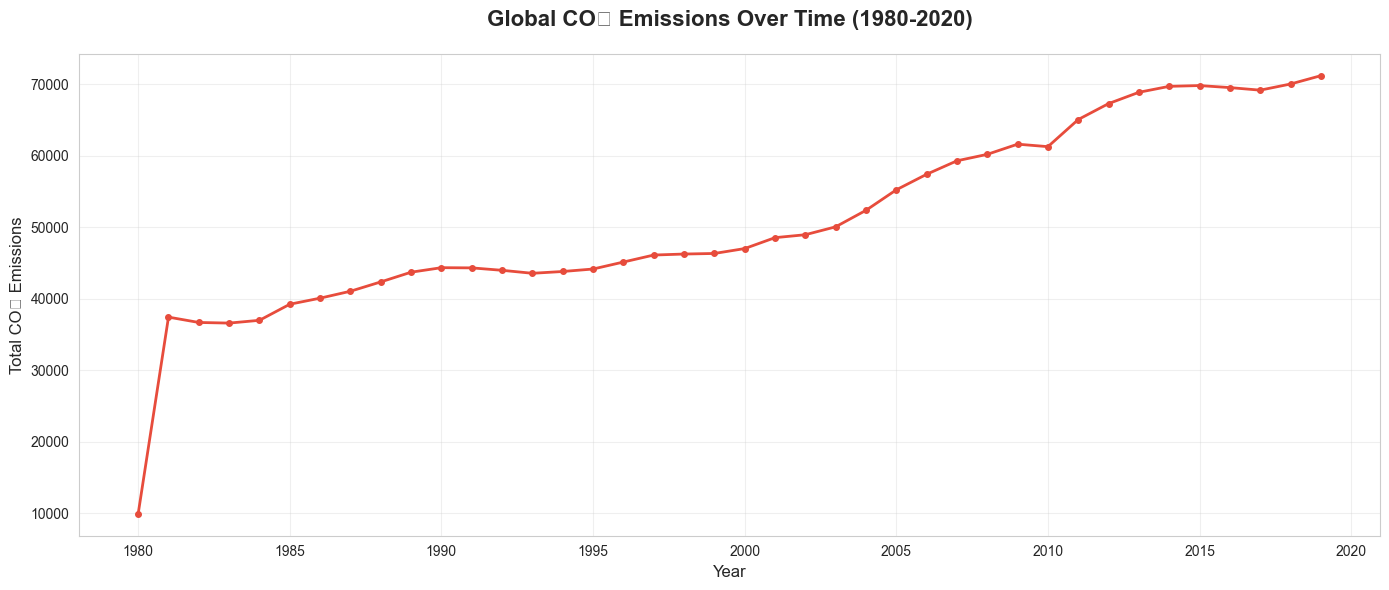

In [5]:
# Aggregate CO2 emissions by year
yearly_co2 = df.groupby('Year')['CO2_emission'].sum()

# Create line plot
plt.figure(figsize=(14, 6))
plt.plot(yearly_co2.index, yearly_co2.values, linewidth=2, color='#e74c3c', marker='o', markersize=4)
plt.title('Global CO₂ Emissions Over Time (1980-2020)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total CO₂ Emissions', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
